In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import networkx as nx
from mlxtend.frequent_patterns import association_rules
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, fpmax, fpgrowth
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
plt.style.use('default')
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)

C:\Users\user\anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  from ipykernel import kernelapp as app


In [2]:
df = pd.read_csv("HR_Employee_MissingValuesFilled.csv", skipinitialspace=True, sep=',')

In [3]:
df['Age_Range'] = pd.qcut(df['Age'], q=4, labels=['<=30', '>30 <=36', '>36 <=43', '>43'])
df['HourlyRate_Range'] = pd.qcut(df['HourlyRate'], q=4, labels=['<=48', '>48 <=60', '>60 <=80', '>80'])
df['DistanceFromHome_Range'] = pd.qcut(df['DistanceFromHome'], q=4, labels=['<=2', '>2 <=5', '>6 <=15', '>15'])

In [4]:
columns = ['Attrition',
          'Age_Range',
          'BusinessTravel',
          'Department',
          'DistanceFromHome_Range',
          'Education',
          'EducationField',
          'EnvironmentSatisfaction',
          'Gender',
          'HourlyRate_Range',
          'JobInvolvement',
          'JobLevel',
          'JobRole',
          'JobSatisfaction',
          'MaritalStatus']
not_used_columns = list(set(df.columns.to_list()) - set(columns))
df = pd.get_dummies(df, columns=columns)
df.drop(labels=not_used_columns, axis=1, inplace=True)

In [5]:
#Apriori min support
min_support = 0.5
#Max lenght of apriori n-grams
max_len = 5
frequent_items = apriori(df, use_colnames=True, min_support=min_support, max_len=max_len + 1)
frequent_items

,support,itemsets
0,0.838776,(Attrition_No)
1,0.733333,(BusinessTravel_Travel_Rarely)
2,0.653741,(Department_Research & Development)
3,0.623129,(Gender_Male)
4,0.590476,(JobInvolvement_3)
5,0.615646,"(Attrition_No, BusinessTravel_Travel_Rarely)"
6,0.563265,"(Attrition_No, Department_Research & Development)"
7,0.522449,"(Attrition_No, Gender_Male)"
8,0.505442,"(Attrition_No, JobInvolvement_3)"


In [6]:
#Apriori min support
min_support = 0.1

#Max lenght of apriori n-grams
max_len = 3

frequent_items = apriori(df, use_colnames=True, min_support=min_support, max_len=max_len + 1)
rules = association_rules(frequent_items, metric='lift', min_threshold=1)

target = '{\'Attrition_No\'}'

results_attrition_no = rules[rules['consequents'].astype(str).str.contains(target, na=False)].sort_values(by='confidence', ascending=False)

results_attrition_no.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1949,"(BusinessTravel_Travel_Rarely, JobLevel_2, Department_Research & Development)",(Attrition_No),0.144898,0.838776,0.139456,0.962441,1.147436,0.017919,4.292602
2525,"(Gender_Male, JobLevel_2, Department_Research & Development)",(Attrition_No),0.119048,0.838776,0.112925,0.948571,1.130900,0.013071,3.134921
1036,"(JobLevel_2, JobSatisfaction_4)",(Attrition_No),0.117007,0.838776,0.110884,0.947674,1.129831,0.012742,3.081179
598,"(JobLevel_2, Department_Research & Development)",(Attrition_No),0.191156,0.838776,0.180952,0.946619,1.128573,0.020615,3.020272
2576,"(JobLevel_2, JobInvolvement_3, Department_Research & Development)",(Attrition_No),0.111565,0.838776,0.105442,0.945122,1.126788,0.011865,2.937868
2109,"(EducationField_Life Sciences, BusinessTravel_Travel_Rarely, JobLevel_2)",(Attrition_No),0.108163,0.838776,0.102041,0.943396,1.124730,0.011316,2.848299
2337,"(BusinessTravel_Travel_Rarely, JobLevel_2, MaritalStatus_Married)",(Attrition_No),0.128571,0.838776,0.120408,0.936508,1.116518,0.012566,2.539286
2762,"(Gender_Male, JobInvolvement_3, JobSatisfaction_4)",(Attrition_No),0.107483,0.838776,0.100000,0.930380,1.109212,0.009846,2.315770
792,"(EducationField_Life Sciences, JobLevel_2)",(Attrition_No),0.146939,0.838776,0.136054,0.925926,1.103902,0.012806,2.176531
2717,"(Gender_Male, JobInvolvement_3, EnvironmentSatisfaction_3)",(Attrition_No),0.112925,0.838776,0.104082,0.921687,1.098848,0.009363,2.058713


In [7]:
#Apriori min support
min_support = 0.02
#Max lenght of apriori n-grams
max_len = 3
frequent_items = apriori(df, use_colnames=True, min_support=min_support, max_len=max_len + 1)
rules = association_rules(frequent_items, metric='lift', min_threshold=1)
target = '{\'Attrition_Yes\'}'
results_attrition_yes = rules[rules['consequents'].astype(str).str.contains(target, na=False)].sort_values(by='confidence', ascending=False)
results_attrition_yes.head(15)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
66757,"(Gender_Female, JobLevel_1, MaritalStatus_Single)",(Attrition_Yes),0.053741,0.161224,0.023129,0.430380,2.669444,0.014465,1.472517
5346,"(JobRole_Sales Representative, JobLevel_1)",(Attrition_Yes),0.051701,0.161224,0.021769,0.421053,2.611592,0.013433,1.448794
66605,"(JobRole_Sales Representative, JobLevel_1, Department_Sales)",(Attrition_Yes),0.051701,0.161224,0.021769,0.421053,2.611592,0.013433,1.448794
4992,"(JobLevel_1, Department_Sales)",(Attrition_Yes),0.051701,0.161224,0.021769,0.421053,2.611592,0.013433,1.448794
66217,"(JobLevel_1, MaritalStatus_Single, BusinessTravel_Travel_Rarely)",(Attrition_Yes),0.098639,0.161224,0.040816,0.413793,2.566565,0.024913,1.430852
66178,"(JobSatisfaction_1, BusinessTravel_Travel_Rarely, JobLevel_1)",(Attrition_Yes),0.051020,0.161224,0.021088,0.413333,2.563713,0.012863,1.429731
66688,"(Education_3, MaritalStatus_Single, JobLevel_1)",(Attrition_Yes),0.061224,0.161224,0.025170,0.411111,2.549930,0.015299,1.424336
5006,"(JobRole_Sales Representative, Department_Sales)",(Attrition_Yes),0.056463,0.161224,0.022449,0.397590,2.466067,0.013346,1.392367
103,(JobRole_Sales Representative),(Attrition_Yes),0.056463,0.161224,0.022449,0.397590,2.466067,0.013346,1.392367
66731,"(EducationField_Life Sciences, MaritalStatus_Single, JobLevel_1)",(Attrition_Yes),0.057823,0.161224,0.022449,0.388235,2.408042,0.013126,1.371075


In [8]:
frequent_items['length'] = frequent_items['itemsets'].apply(lambda x: len(x))

In [9]:
frequent_items[ (frequent_items['length'] == 2) &
                   (frequent_items['support'] >= 0.05) ]

,support,itemsets,length
61,0.228571,"(Age_Range_<=30, Attrition_No)",2
62,0.212245,"(Attrition_No, Age_Range_>30 <=36)",2
63,0.209524,"(Attrition_No, Age_Range_>36 <=43)",2
64,0.188435,"(Attrition_No, Age_Range_>43)",2
65,0.078912,"(Attrition_No, BusinessTravel_Non-Travel)",2
66,0.144218,"(Attrition_No, BusinessTravel_Travel_Frequently)",2
67,0.615646,"(Attrition_No, BusinessTravel_Travel_Rarely)",2
69,0.563265,"(Attrition_No, Department_Research & Development)",2
70,0.240816,"(Attrition_No, Department_Sales)",2
71,0.248299,"(Attrition_No, DistanceFromHome_Range_<=2)",2


In [10]:
frequent_items[ (frequent_items['length'] == 3) ].head()

,support,itemsets,length
1278,0.036735,"(Age_Range_<=30, Attrition_No, BusinessTravel_Travel_Frequently)",3
1279,0.173469,"(Age_Range_<=30, Attrition_No, BusinessTravel_Travel_Rarely)",3
1280,0.152381,"(Age_Range_<=30, Attrition_No, Department_Research & Development)",3
1281,0.068027,"(Age_Range_<=30, Attrition_No, Department_Sales)",3
1282,0.065306,"(Age_Range_<=30, Attrition_No, DistanceFromHome_Range_<=2)",3


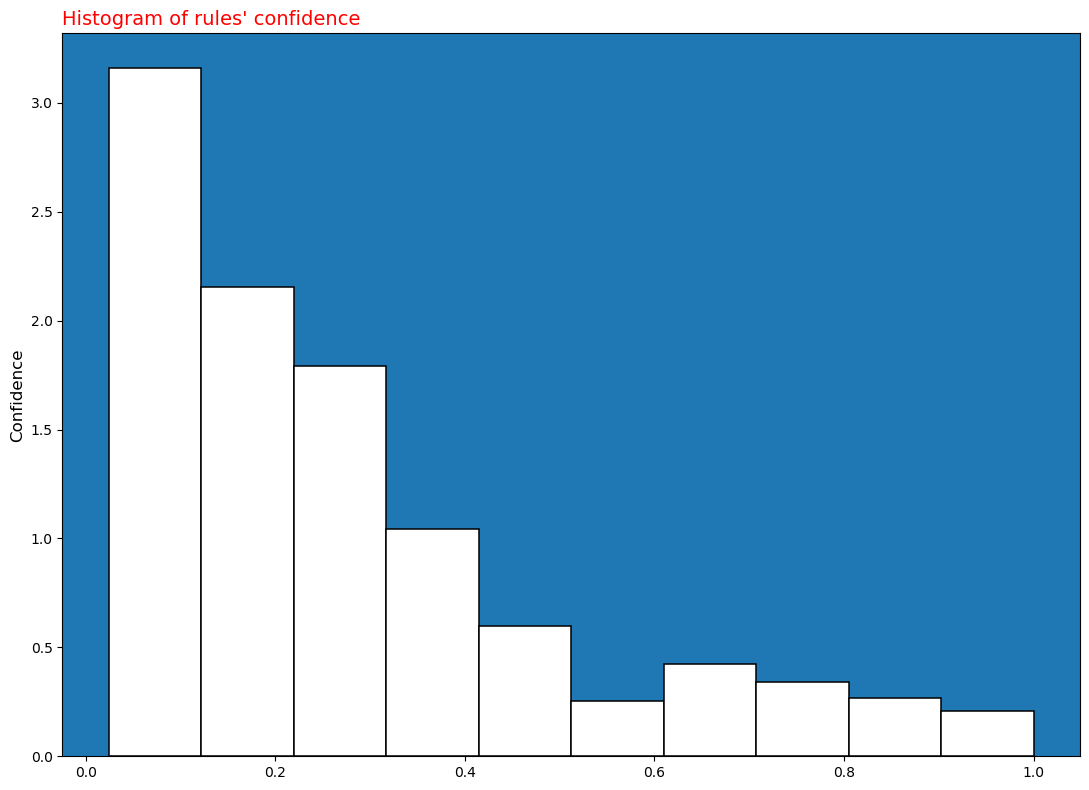

In [11]:
fig, ax = plt.subplots(nrows=1, ncols=1)
fig.set_size_inches(11, 8)
ax.hist(rules['confidence'], density=True, color="#FFFFFF", edgecolor="black", linewidth=1.1)
ax.set_title("Histogram of rules' confidence", fontsize=14, loc="left", color="red")
ax.set_ylabel("Confidence", fontsize=12, color="#000000")
ax.grid(False)
ax.set_facecolor(None)
plt.tight_layout()
plt.show()

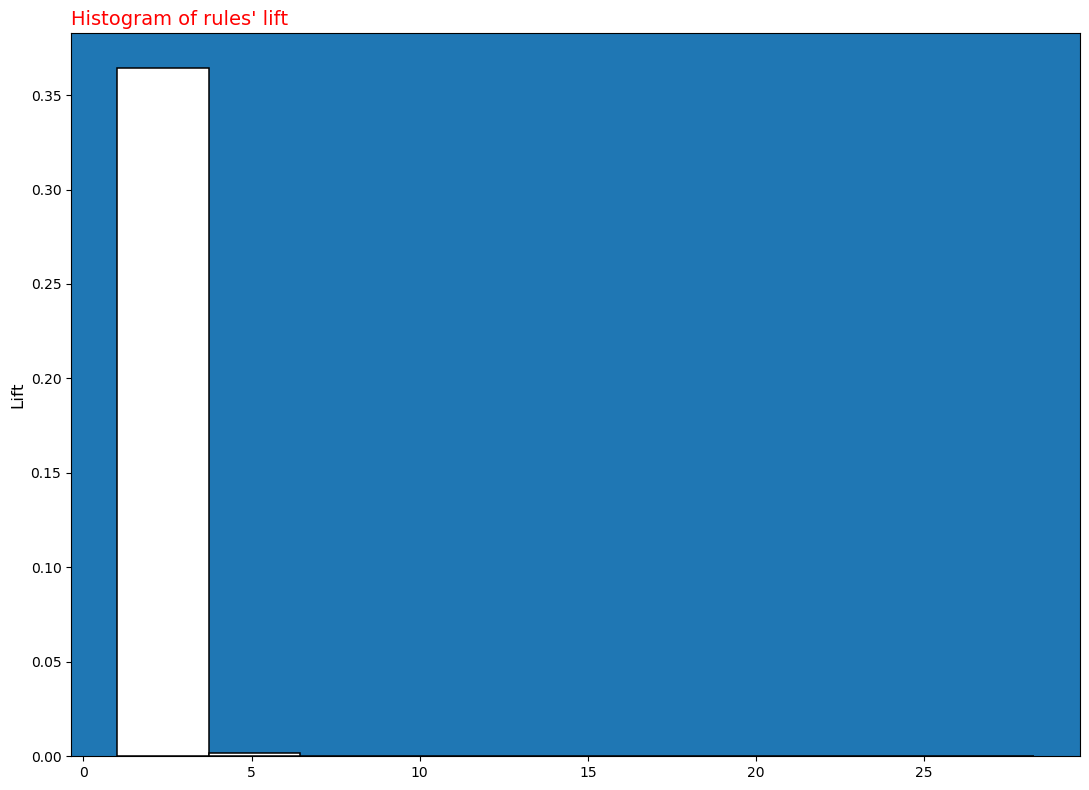

In [12]:
fig, ax = plt.subplots(nrows=1, ncols=1)
fig.set_size_inches(11, 8)
ax.hist(rules['lift'], density=True, color="#FFFFFF", edgecolor="black", linewidth=1.1)
ax.set_title("Histogram of rules' lift", fontsize=14, loc="left", color="red")
ax.set_ylabel("Lift", fontsize=12, color="#000000")
ax.grid(False)
ax.set_facecolor(None)
plt.tight_layout()
plt.show()

C:\Users\user\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


Text(0, 0.5, 'Support')

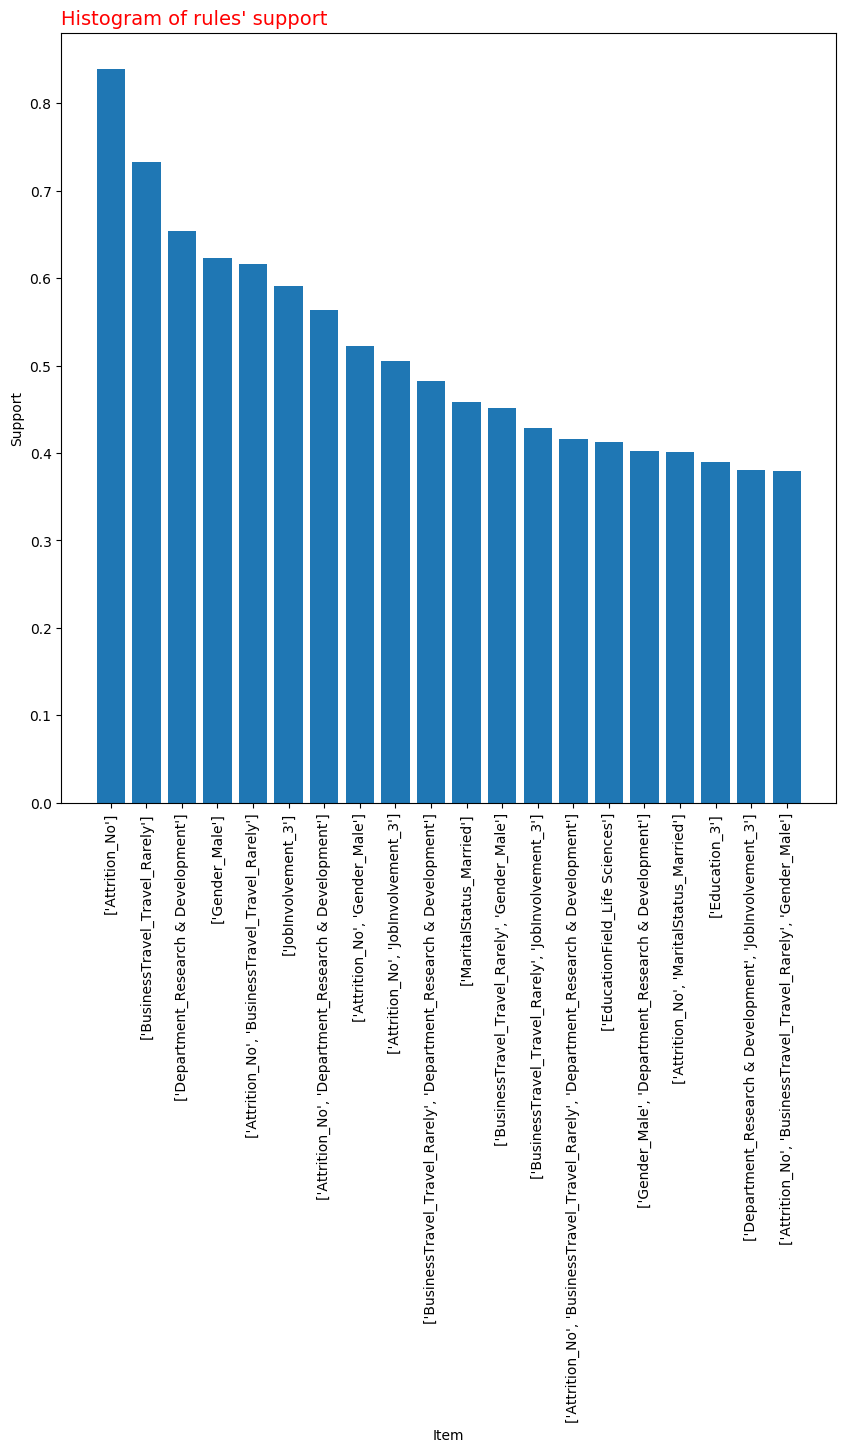

In [13]:
top_items = frequent_items.sort_values('support', ascending = False)[:20]
for i in range(len(top_items.itemsets)):
    top_items.itemsets.iloc[i] = str(list(top_items.itemsets.iloc[i]))
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111)
ax.bar(top_items.itemsets, top_items.support)
for label in ax.xaxis.get_ticklabels():
    label.set_rotation(90)
ax.set_title("Histogram of rules' support", fontsize=14, loc="left", color="red")
plt.xlabel('Item')
plt.ylabel('Support')

In [14]:
frequent_itemsets_fp=fpgrowth(df, min_support=0.1, use_colnames=True)
rules = association_rules(frequent_itemsets_fp, metric="lift", min_threshold=0.7)
target = '{\'Attrition_No\'}'
results_attrition_no = rules[rules['consequents'].astype(str).str.contains(target, na=False)].sort_values(by='confidence', ascending=False)
results_attrition_no.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2259,"(BusinessTravel_Travel_Rarely, JobLevel_2, Department_Research & Development)",(Attrition_No),0.144898,0.838776,0.139456,0.962441,1.147436,0.017919,4.292602
2273,"(Gender_Male, JobLevel_2, Department_Research & Development)",(Attrition_No),0.119048,0.838776,0.112925,0.948571,1.130900,0.013071,3.134921
2448,"(JobLevel_2, JobSatisfaction_4)",(Attrition_No),0.117007,0.838776,0.110884,0.947674,1.129831,0.012742,3.081179
2234,"(JobLevel_2, Department_Research & Development)",(Attrition_No),0.191156,0.838776,0.180952,0.946619,1.128573,0.020615,3.020272
2287,"(JobLevel_2, JobInvolvement_3, Department_Research & Development)",(Attrition_No),0.111565,0.838776,0.105442,0.945122,1.126788,0.011865,2.937868
2171,"(EducationField_Life Sciences, BusinessTravel_Travel_Rarely, JobLevel_2)",(Attrition_No),0.108163,0.838776,0.102041,0.943396,1.124730,0.011316,2.848299
2221,"(BusinessTravel_Travel_Rarely, JobLevel_2, MaritalStatus_Married)",(Attrition_No),0.128571,0.838776,0.120408,0.936508,1.116518,0.012566,2.539286
2401,"(Gender_Male, JobInvolvement_3, JobSatisfaction_4)",(Attrition_No),0.107483,0.838776,0.100000,0.930380,1.109212,0.009846,2.315770
4484,"(Gender_Male, Department_Research & Development, BusinessTravel_Travel_Rarely, MaritalStatus_Married)",(Attrition_No),0.130612,0.838776,0.121088,0.927083,1.105282,0.011534,2.211079
2158,"(EducationField_Life Sciences, JobLevel_2)",(Attrition_No),0.146939,0.838776,0.136054,0.925926,1.103902,0.012806,2.176531


In [15]:
results_attrition_no.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2259,"(BusinessTravel_Travel_Rarely, JobLevel_2, Department_Research & Development)",(Attrition_No),0.144898,0.838776,0.139456,0.962441,1.147436,0.017919,4.292602
2273,"(Gender_Male, JobLevel_2, Department_Research & Development)",(Attrition_No),0.119048,0.838776,0.112925,0.948571,1.130900,0.013071,3.134921
2448,"(JobLevel_2, JobSatisfaction_4)",(Attrition_No),0.117007,0.838776,0.110884,0.947674,1.129831,0.012742,3.081179
2234,"(JobLevel_2, Department_Research & Development)",(Attrition_No),0.191156,0.838776,0.180952,0.946619,1.128573,0.020615,3.020272
2287,"(JobLevel_2, JobInvolvement_3, Department_Research & Development)",(Attrition_No),0.111565,0.838776,0.105442,0.945122,1.126788,0.011865,2.937868
2171,"(EducationField_Life Sciences, BusinessTravel_Travel_Rarely, JobLevel_2)",(Attrition_No),0.108163,0.838776,0.102041,0.943396,1.124730,0.011316,2.848299
2221,"(BusinessTravel_Travel_Rarely, JobLevel_2, MaritalStatus_Married)",(Attrition_No),0.128571,0.838776,0.120408,0.936508,1.116518,0.012566,2.539286
2401,"(Gender_Male, JobInvolvement_3, JobSatisfaction_4)",(Attrition_No),0.107483,0.838776,0.100000,0.930380,1.109212,0.009846,2.315770
4484,"(Gender_Male, Department_Research & Development, BusinessTravel_Travel_Rarely, MaritalStatus_Married)",(Attrition_No),0.130612,0.838776,0.121088,0.927083,1.105282,0.011534,2.211079
2158,"(EducationField_Life Sciences, JobLevel_2)",(Attrition_No),0.146939,0.838776,0.136054,0.925926,1.103902,0.012806,2.176531


In [16]:
import time
su = frequent_itemsets_fp.support.unique()#all unique support count
#Dictionay storing itemset with same support count key
fredic = {}
for i in range(len(su)):
    inset = list(frequent_itemsets_fp.loc[frequent_itemsets_fp.support ==su[i]]['itemsets'])
    fredic[su[i]] = inset
#Dictionay storing itemset with  support count <= key
fredic2 = {}
for i in range(len(su)):
    inset2 = list(frequent_itemsets_fp.loc[frequent_itemsets_fp.support<=su[i]]['itemsets'])
    fredic2[su[i]] = inset2

In [17]:
#Find Closed frequent itemset
start_time = time.time()
cl = []
for index, row in frequent_itemsets_fp.iterrows():
    isclose = True
    cli = row['itemsets']
    cls = row['support']
    checkset = fredic[cls]
    for i in checkset:
        if (cli!=i):
            if(frozenset.issubset(cli,i)):
                isclose = False
                break
    
    if(isclose):
        cl.append(row['itemsets'])
cl

[frozenset({'Attrition_No'}),
 frozenset({'BusinessTravel_Travel_Rarely'}),
 frozenset({'Department_Research & Development'}),
 frozenset({'Gender_Male'}),
 frozenset({'JobInvolvement_3'}),
 frozenset({'MaritalStatus_Single'}),
 frozenset({'EducationField_Medical'}),
 frozenset({'JobSatisfaction_3'}),
 frozenset({'Education_4'}),
 frozenset({'HourlyRate_Range_>80'}),
 frozenset({'DistanceFromHome_Range_>6 <=15'}),
 frozenset({'Age_Range_>43'}),
 frozenset({'EnvironmentSatisfaction_2'}),
 frozenset({'JobLevel_3'}),
 frozenset({'EducationField_Life Sciences'}),
 frozenset({'DistanceFromHome_Range_<=2'}),
 frozenset({'HourlyRate_Range_>48 <=60'}),
 frozenset({'Age_Range_>30 <=36'}),
 frozenset({'MaritalStatus_Divorced'}),
 frozenset({'Education_1'}),
 frozenset({'Education_3'}),
 frozenset({'JobLevel_2'}),
 frozenset({'JobSatisfaction_4'}),
 frozenset({'EnvironmentSatisfaction_3'}),
 frozenset({'Department_Sales'}),
 frozenset({'Age_Range_<=30'}),
 frozenset({'HourlyRate_Range_<=48'}),
 f

In [18]:
#Find Max frequent itemset
start_time = time.time()
ml = []
for index, row in frequent_itemsets_fp.iterrows():
    isclose = True
    cli = row['itemsets']
    cls = row['support']
    checkset = fredic2[cls]
    for i in checkset:
        if (cli!=i):
            if(frozenset.issubset(cli,i)):
                isclose = False
                break
    
    if(isclose):
        ml.append(row['itemsets'])

In [19]:
ml

[frozenset({'Education_1'}),
 frozenset({'Attrition_No',
            'BusinessTravel_Travel_Rarely',
            'Department_Research & Development',
            'Gender_Male',
            'JobInvolvement_3'}),
 frozenset({'Gender_Female', 'MaritalStatus_Single'}),
 frozenset({'JobLevel_2', 'MaritalStatus_Single'}),
 frozenset({'Education_3', 'MaritalStatus_Single'}),
 frozenset({'Attrition_No',
            'BusinessTravel_Travel_Rarely',
            'Department_Research & Development',
            'MaritalStatus_Single'}),
 frozenset({'Department_Research & Development',
            'Gender_Male',
            'MaritalStatus_Single'}),
 frozenset({'Attrition_No',
            'BusinessTravel_Travel_Rarely',
            'Gender_Male',
            'MaritalStatus_Single'}),
 frozenset({'Gender_Male', 'JobInvolvement_3', 'MaritalStatus_Single'}),
 frozenset({'Department_Research & Development',
            'JobInvolvement_3',
            'MaritalStatus_Single'}),
 frozenset({'Attrition_No',